In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [30]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [31]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [32]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [33]:
nba.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [34]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [35]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

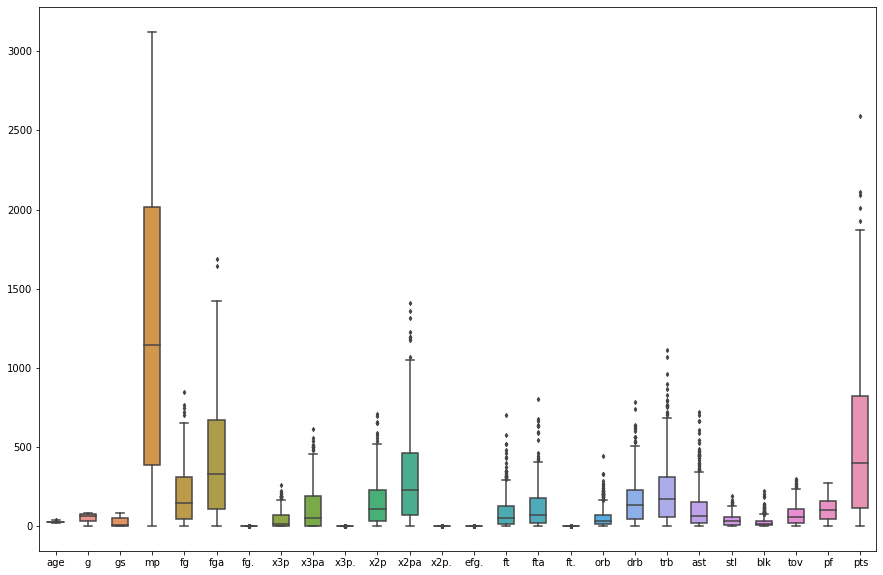

In [36]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=nba_numeric, width= 0.5,ax=ax,  fliersize=3)

In [37]:
q = nba_numeric['fg'].quantile(0.95)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = nba_numeric[nba_numeric['fg']<q]
q = data_cleaned['fga'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['fga']<q]
q = data_cleaned['x3p'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['x3p']<q]
q = data_cleaned['x3pa'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['x3pa']<q]
q = data_cleaned['x2p'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['x2p']<q]
q = data_cleaned['x2pa'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['x2pa']<q]
q = data_cleaned['ft'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['ft']<q]
q = data_cleaned['fta'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['fta']<q]
q = data_cleaned['orb'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['orb']<q]
q = data_cleaned['drb'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['drb']<q]
q = data_cleaned['trb'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['trb']<q]
q = data_cleaned['ast'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['ast']<q]
q = data_cleaned['stl'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['stl']<q]
q = data_cleaned['trb'].quantile(0.95)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['trb']<q]
q = data_cleaned['tov'].quantile(0.95)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['tov']<q]
q = data_cleaned['pts'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['pts']<q]


In [38]:
X = nba_numeric.drop(columns = ['pts'])
y = nba_numeric['pts']

In [39]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
nba_scaled = scalar.fit_transform(X)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(nba_scaled,i) for i in range(nba_scaled.shape[1])]
vif["Features"] = X.columns
vif

C:\Users\Vkannan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,Features
0,1.121546,age
1,7.948495,g
2,6.154578,gs
3,43.945569,mp
4,inf,fg
5,inf,fga
6,20.003964,fg.
7,inf,x3p
8,inf,x3pa
9,1.916578,x3p.


In [46]:
new_df = pd.DataFrame(StandardScaler().fit_transform(nba_scaled), columns=X.columns, index=X.index)

In [47]:
nba_scaled = new_df.drop({'mp','fg.','fga','fg','x3p','x3pa','x2p','x2pa','efg.','fta','ft','orb','drb','trb','tov','pf'},axis=1)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(nba_scaled,y, test_size= 0.25)

In [49]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [50]:
y_pred = knn.predict(x_test)

In [51]:
knn.score(x_train,y_train)

0.19444444444444445

In [52]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.0


In [53]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [54]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [55]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s


C:\Users\Vkannan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=3; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 4/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 5/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=5; total time=   0.0s
[CV 1/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 2/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 3/5] END algorithm=ball_tree, leaf_size=18, n_neighbors=7; total time=   0.0s
[CV 4/5] END alg

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [56]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [57]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

In [58]:
knn.score(x_train,y_train)

0.3861111111111111

In [59]:
knn.score(x_test,y_test)

0.01652892561983471

In [62]:
kfold = KFold(n_splits=12,random_state= None)
kfold.get_n_splits(nba_scaled)

12

In [64]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(nba_scaled):
    X_train, X_test = nba_scaled.iloc[train_index], nba_scaled.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] 
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.3931818181818182 and test score is :   0.0
for k =  2
train_score is :   0.35147392290249435 and test score is :   0.025
for k =  3
train_score is :   0.37188208616780044 and test score is :   0.025
for k =  4
train_score is :   0.3786848072562358 and test score is :   0.0
for k =  5
train_score is :   0.3900226757369615 and test score is :   0.025
for k =  6
train_score is :   0.36281179138321995 and test score is :   0.075
for k =  7
train_score is :   0.3673469387755102 and test score is :   0.025
for k =  8
train_score is :   0.3922902494331066 and test score is :   0.0
for k =  9
train_score is :   0.3764172335600907 and test score is :   0.05
for k =  10
train_score is :   0.3832199546485261 and test score is :   0.05
for k =  11
train_score is :   0.36961451247165533 and test score is :   0.0
for k =  12
train_score is :   0.3764172335600907 and test score is :   0.075
************************************************
******************************